# Ex1 Dating

## 准备数据

In [1]:
from numpy import *
import operator
def importdata(filepath):
    """
    Function to load txt data to matrix
    """
    with open(filepath) as fileid:
        content = fileid.readlines()
    listdata = [item.strip('\n').split('\t') for item in content]
    arraydata = array(listdata)
    returnMat = arraydata[:,:3]
    labelVector = arraydata[:,3] 
    return returnMat, labelVector

In [2]:
datingDataMat, datingLabels = importdata('datingTestSet2.txt')
datingDataMat

array([['40920', '8.326976', '0.953952'],
       ['14488', '7.153469', '1.673904'],
       ['26052', '1.441871', '0.805124'],
       ..., 
       ['26575', '10.650102', '0.866627'],
       ['48111', '9.134528', '0.728045'],
       ['43757', '7.882601', '1.332446']],
      dtype='<U9')

In [3]:
# 这一步中datingDataMat类型为dtype='<U9'，先转换成float类型，不然后面运算会报错
datingDataMat = datingDataMat.astype('float')
datingDataMat

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

In [4]:
datingLabels[0:20]

array(['3', '2', '1', '1', '1', '1', '3', '3', '1', '3', '1', '1', '2',
       '1', '1', '1', '1', '1', '2', '3'],
      dtype='<U9')

## 分析数据

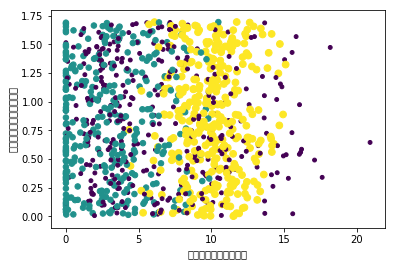

In [5]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2], 15.0*array(datingLabels,dtype = 'int'), 15.0*array(datingLabels,dtype = 'int'))
ax.set_xlabel(u'玩游戏所耗时间百分比')
ax.set_ylabel(u'每周消费的冰淇淋公升数')

## 归一化

In [6]:
def normlize(data):
    maxvalue = data.max(0)
    minvalue = data.min(0)
    return (data - minvalue)/tile(maxvalue - minvalue,(data.shape[0],1))

In [7]:
normMat = normlize(datingDataMat)
normMat

array([[ 0.44832535,  0.39805139,  0.56233353],
       [ 0.15873259,  0.34195467,  0.98724416],
       [ 0.28542943,  0.06892523,  0.47449629],
       ..., 
       [ 0.29115949,  0.50910294,  0.51079493],
       [ 0.52711097,  0.43665451,  0.4290048 ],
       [ 0.47940793,  0.3768091 ,  0.78571804]])

In [8]:
datingDataMat

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

In [9]:
datingDataMat.shape[0]

1000

## KNN分类

In [11]:
def classify(inputX, dataSet, label, k):
    '''
    Input:
        inputX:   vector to compare to existing dataset (1xN);
        dataSet:  known data set (MxN);
        label:    data set label (1xM);
        k:        number of neighbors to use
    '''
    # caculate O-distance
    rows = dataSet.shape[0];
    diffMat = tile(inputX,(rows,1)) - dataSet;
    distance = sqrt(sum(diffMat ** 2,1));
    # select kth points with smallest distance
    index = argsort(distance);
    count = {};
    for i in range(k):
        ithlabel = label[index[i]]
        count[ithlabel] = count.get(ithlabel,0) + 1
    sortedClassCount = sorted(count.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount